# 이진분류를 위한 Binary Cross Entropy Loss
- 가정 : 강아지와 고양이를 분류하는 이진분류
- 강아지 사진에는 레이블 1, 고양이는  레이블 0으로 부여
- 앞서 언급했듯이 딥러닝은 **이 입력에는 이 출력이 나와야해!!** 이를 Loss함수를 이용하면 **Loss함수를 최대한 줄여야해!!**

## 출력 정의
- Loss함수는 앞서 정의 했듯이, **강아지 사진에 대해서는 출력이 1에 고양이 사진에 대해서는 출력이 0에 가까울수록 작은 값**을 가져야합니다.
- 그렇다면, Sigmoid 함수를 사용하므로 q는 항상 0과 1사이의 값을 가집니다.
    - 따라서 출력이 1과 가까우면, 강아지일 확률이 높아지는 것이며, 0과 가까우면 강아지가 아닐확률이 높아지는것이며, 이는 이진분류이기때문에 고양이일 확률로 직결됩니다.
    - 식으로 표현하면 아래와 같습니다. $$q^{y} (1 - q)^{1-y}$$

- 여기서, 우리는 일반적으로 학습을 시킬때, Mini-Batch 방식으로 학습이 진행됩니다.
- 학습을 진행할 때는 여러 데이터에 대한 예측확률을 모두 곱해야합니다.
    - 왜냐하면 이는 각 데이터 추출이 서로 독립적인 사건이기 때문입니다. 예를 들어 batch size가 32라면?
    $$q^{y_{1}} (1 - q)^{1-y_{1}}q^{y_{2}} (1 - q)^{1-y_{2}}...q^{y_{32}} (1 - q)^{1-y_{32}}$$

- 하지만, 이 방식은 Underflow문제를 일으킬 수 있습니다.
    - Underflow란? 컴퓨터가 표현할 수 있는 가장 작은 양수보다 작은 수를 계산하려고 할때 발생하는 현상
- 이 문제를 해결하기 위해 log함수를 취합니다.
$$logq^{y_{1}} (1 - q)^{1-y_{1}}q^{y_{2}} (1 - q)^{1-y_{2}}...q^{y_{32}} (1 - q)^{1-y_{32}}$$
$$=logq^{y_{1}} (1 - q)^{1-y_{1}}+logq^{y_{2}} (1 - q)^{1-y_{2}}...+logq^{y_{32}} (1 - q)^{1-y_{32}}$$
$$=\displaystyle\sum_{n=1}^{32}{logq^{y_{n}} (1 - q)^{1-y_{n}}}$$

- 이렇게 log를 취함으로써 곱셈을 덧셈으로 바꾸고, 0~1의 확률값을 -무한 ~ 0사이의 넓은 범위의 값으로 변환하여 UnderFlow 문제를 해결할수 있습니다.
- 이를 최종적으로 음수를 취하고 합이 아닌 평균으로 다시 구하면 BCE Loss를 얻을 수 있습니다.
$$\frac{1}{32}\displaystyle\sum_{n=1}^{32}{-logq^{y_{n}} (1 - q)^{1-y_{n}}}$$
- 음수를 취하는 이유는 최대화 문제를 최소화로 변환하기 위해서 적용합니다.

> **왜 log??**
    > - 로그함수가 단도 증가함수이기 때문입니다. x<y라면, log(x)<log(y)가 항상 성립하기 때문에, 원래 함수를 최대화 하는것과 로그를 취한 함수를 최대화 하는것이 동일한 결과를 냅니다.
    > ![Screenshot from 2025-03-05 20-36-49.png](<attachment:Screenshot from 2025-03-05 20-36-49.png>)
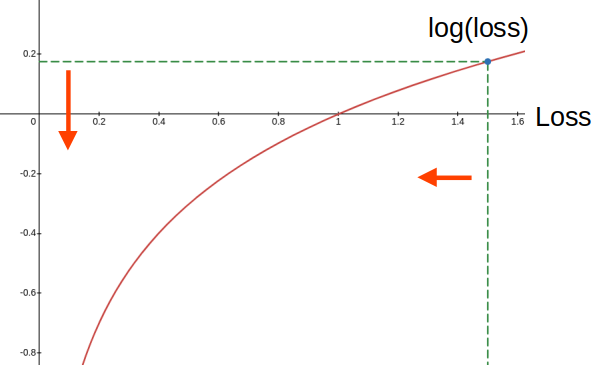

# 이진분류를 위한 로지스틱 회귀(Logistic Regression)
- 로지스틱 회귀라는 이름은 Sigmoid 함수를 일반화된 형태인 Logistic 함수에서 유래되었습니다.
- 즉, **입력과 출력 사이의 관계를 Logistic 함수 형태로 놓고, 그 함수의 파라미터를 추정**하는 것을 목표로 합니다.
    - 이러한 특성때문에 로지스틱 회귀라는 이름이 붙었다고 생각합니다.

## 로지스틱의 또 다른 의미
- **Logit을 선형 회귀를 통해 구하는 것**으로도 해석이 가능합니다.
    - 여기서 Logit은 Log-Odds의 준말로, Odds에 로그를 취한 값입니다.
        - Odds는 '승산'이라고 하고 승릴확률을 패배확률로 나눈 것, 아래의 식으로 표현
        - 승산은 : 승리할 확률이 얼마나 되는가? 의 그 승산입니다. $$ Odds = \frac{q}{1-q}$$
    - logit이니까 미지수 이름을 l로 잡고 자연로그를 취합니다. $$ l=log{ \frac{q}{1-q} } $$
    - 이 식을 풀면 아래와 같이 됩니다.
    $$ l=log{ \frac{q}{1-q} } \rightarrow e^{l} = \frac{q}{1-q} \rightarrow e^{-l} = \frac{1-q}{q} \rightarrow q = \frac{1}{1+e^{-l}} $$
    - 위 수식의 마지막 결과값은 sigmoid함수와 동일합니다.
        - 따라서 logit에 sigmoid를 적용하면 확률값을 얻을 수 있습니다.

## 다시 이진분류
- Sigmoid를 통과한후의 값을 "강아지 사진일 확률"이라고 했었으니, **통과하기 직전의 값은 '강아지 사진에 대한 Logit 값'으로 해석**할수 있습니다.
- 단계로 나누면 아래와 같습니다.
    1. 사진을 입력받아 Logit을 출력하는 신경망
    2. Logit을 확률로 변환하는 Sigmoid 함수

- 위와 같이 보면 인공신경망의 역할은 입력과 Logit 사이의 선형 관계를 찾는 것이 되며, Sigmoid는 신경망의 일부가 아니라 Logit을 확률로 변환하고, BCE Loss를 계산하기 위해 사용되는 함수로 볼 수 있습니다.

### 정리 : **로지스틱 회귀는 선형 회귀를 통해 Logit(승산에 log취한 것)을 예측하고, 이를 확률로 변환하여 이진 분류 문제를 해결하는 방법**이라고 할 수 있습니다.